In [45]:
import json
import matplotlib
from matplotlib import pyplot as plt

In [83]:
def plot_runs(julia, rdes_gpu, rdes_cpu, gpu_name=None, cpu_name=None, plot_list_julia=None, plot_list_cpu=None, plot_list_gpu=None, save_name=None, title="Work Precision Diagram"):
    fig, ax = plt.subplots(1)
    ax.set_title(title)
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_ylabel("t [s]")
    ax.set_xlabel("Strong Error")

    for batch_size in rdes_gpu:
        if plot_list_gpu and batch_size not in plot_list_gpu:
            continue
        lbl = f"RDE Solver (batch size {batch_size} on {gpu_name})" if gpu_name else f"RDE Solver (batch size {batch_size})"
        ax.plot([v[2] for v in rdes_gpu[batch_size].values()], [v[0]/int(batch_size) for v in rdes_gpu[batch_size].values()], marker='o', label=lbl)
        # ax.plot([v[2] for v in additive_rdes[batch_size].values()], [v[0] for v in additive_rdes[batch_size].values()], marker='o', label=f"batch size {batch_size} (total time)")

    for batch_size in rdes_cpu:
        if plot_list_cpu and batch_size not in plot_list_cpu:
            continue
        lbl = f"RDE Solver (batch size {batch_size} on {cpu_name})" if cpu_name else f"RDE Solver (x{batch_size})"
        ax.plot([v[2] for v in rdes_cpu[batch_size].values()], [v[0]/int(batch_size) for v in rdes_cpu[batch_size].values()], marker='.', label=lbl)
        
    for julia_run in julia:
        if plot_list_julia and julia_run['name'] not in plot_list_julia:
            continue
        ax.plot(julia_run['errors'], julia_run['times'], marker='x', label=julia_run['name'])

    ax.legend()
    if save_name:
        plt.savefig(save_name)
    plt.show()

## Additive Noise Problem

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


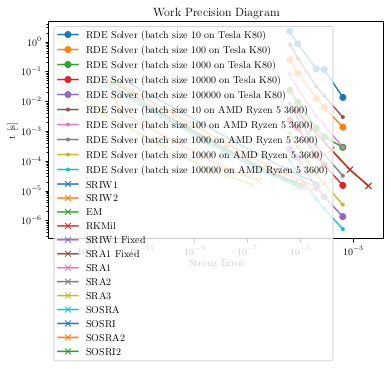

In [84]:
with open("../models/additive_noise_problem_julia.json") as f:
    additive_julia = json.load(f)
with open("../models/additive_noise_problem_sols_Tesla_K80.json") as f:
    additive_rdes_gpu = json.load(f)
with open("../models/additive_noise_problem_sols_AMD_Ryzen_5_3600.json") as f:
    additive_rdes_cpu = json.load(f)
plot_runs(additive_julia, additive_rdes_gpu, additive_rdes_cpu, "Tesla K80", "AMD Ryzen 5 3600")

In [85]:
# for LaTex export only

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


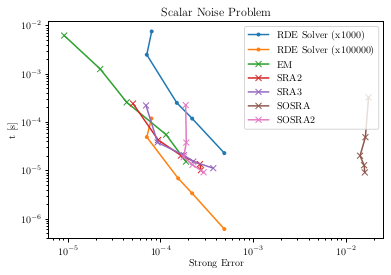

In [91]:
plot_runs(additive_julia, [], additive_rdes_cpu, plot_list_cpu=['100000', '1000'], plot_list_julia=['SRA2', 'SRA3', 'SOSRA', 'SOSRA2', 'EM'], save_name='../../Tex/Graphics/work_precision_additive_noise.pgf', title="Scalar Noise Problem")

## Scalar Noise Problem

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


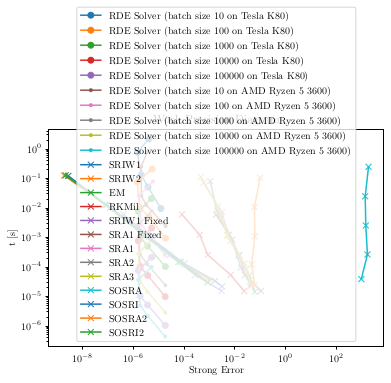

In [87]:
with open("../models/diagonal_noise_problem_julia.json") as f:
    additive_julia = json.load(f)
with open("../models/scalar_noise_problem_sols_Tesla_K80.json") as f:
    additive_rdes_gpu = json.load(f)
with open("../models/scalar_noise_problem_sols_AMD_Ryzen_5_3600.json") as f:
    additive_rdes_cpu = json.load(f)
plot_runs(additive_julia, additive_rdes_gpu, additive_rdes_cpu, "Tesla K80", "AMD Ryzen 5 3600")

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


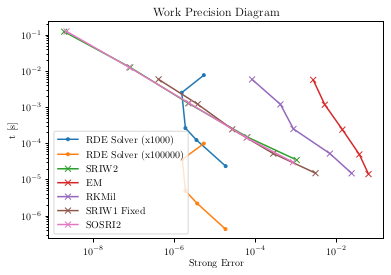

In [88]:
plot_runs(additive_julia, [], additive_rdes_cpu, plot_list_cpu=['100000', '1000'], plot_list_julia=['SRIW1 Fixed', 'SRIW2', 'RKMil', 'EM', "SOSRI2"], save_name='../../Tex/Graphics/work_precision_scalar_noise.pgf')

## Scalar Wave Problem

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


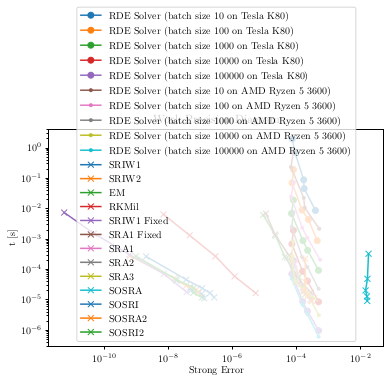

In [89]:
with open("../models/scalar_wave_problem_julia.json") as f:
    additive_julia = json.load(f)
with open("../models/scalar_wave_problem_sols_Tesla_K80.json") as f:
    additive_rdes_gpu = json.load(f)
with open("../models/scalar_wave_problem_sols_AMD_Ryzen_5_3600.json") as f:
    additive_rdes_cpu = json.load(f)
plot_runs(additive_julia, additive_rdes_gpu, additive_rdes_cpu, "Tesla K80", "AMD Ryzen 5 3600")

/tmp/ipykernel_21925/372952310.py:30: UserWarning: Matplotlib is currently using pgf, which is a non-GUI backend, so cannot show the figure.
  plt.show()


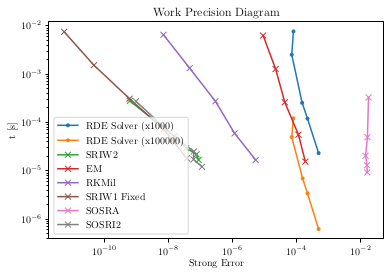

In [90]:
plot_runs(additive_julia, [], additive_rdes_cpu, plot_list_cpu=['100000', '1000'], plot_list_julia=['SRIW1 Fixed', 'SRIW2', 'RKMil', 'EM', "SOSRI2", 'SOSRA'], save_name='../../Tex/Graphics/work_precision_scalar_wave.pgf')